# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [60]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_data=pd.merge(study_results,mouse_metadata,how="outer", on="Mouse ID")
# Display the data table for preview
combined_data


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [61]:
# Checking the number of mice.
mice_number=combined_data["Mouse ID"].unique()
len(mice_number)

249

In [62]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
import numpy as np
# CY: Create a random function to show a mouse (any). Not seed provided so every time it will change
m_list=[mouse for mouse in mice_number]
mouse_id=np.random.choice(m_list)
# g989  or"b128"
print(f"The chosen mouse is: {mouse_id}")
combined_data.loc[combined_data["Mouse ID"]==mouse_id, ["Mouse ID","Timepoint"]]

The chosen mouse is: g107


,Mouse ID,Timepoint
11,g107,0
12,g107,5
13,g107,10
14,g107,15
15,g107,20
16,g107,25
17,g107,30
18,g107,35


In [63]:
# Optional: Get all the data for the duplicate mouse ID. 
combined_data.loc[combined_data["Mouse ID"]==mouse_id]

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
11,g107,0,45.000000,0,Ketapril,Female,2,29
12,g107,5,48.791665,0,Ketapril,Female,2,29
13,g107,10,53.435987,0,Ketapril,Female,2,29
14,g107,15,58.135545,0,Ketapril,Female,2,29
15,g107,20,62.706031,0,Ketapril,Female,2,29
16,g107,25,64.663626,0,Ketapril,Female,2,29
17,g107,30,69.160520,0,Ketapril,Female,2,29
18,g107,35,71.905117,0,Ketapril,Female,2,29


In [64]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
without_mouse=combined_data.loc[combined_data["Mouse ID"] != mouse_id]
without_mouse

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [65]:
# Checking the number of mice in the clean DataFrame.
len(without_mouse["Mouse ID"].unique())

248

## Summary Statistics

In [66]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 

mean_tumor=combined_data.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].mean()
median_tumor=combined_data.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].median()
var_tumor=combined_data.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].var()
std_tumor=combined_data.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].std()
sem_tumor=combined_data.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].sem()

# Assemble the resulting series into a single summary DataFrame.
tumor_summary = pd.DataFrame({"Mean Tumor Volume" : mean_tumor,"Median Tumor Volume" : median_tumor,"Tumor Volume Variance" : var_tumor, \
   "Tumor Volume Std Dev": std_tumor, "Tumor Volume Stde Err" : sem_tumor} )
tumor_summary

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std Dev,Tumor Volume Stde Err
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [67]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen
des_stats={"Tumor Volume (mm3)": ['mean', 'median', 'var', 'std','sem']}

# Using the aggregation method, produce the same summary statistics in a single line.
combined_data.groupby(['Drug Regimen']).agg(des_stats)

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.322552  50.854632  42.351070  6.507770  0.512884
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

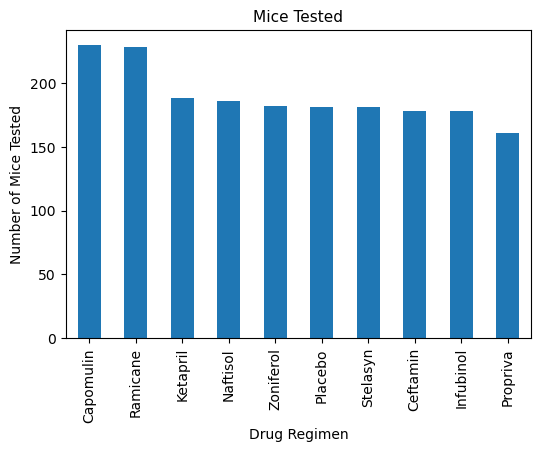

In [68]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

regimen_bar=combined_data.groupby(['Drug Regimen'])['Mouse ID'].count()

barchart=regimen_bar.sort_values( ascending=False).plot(kind='bar',figsize=(6,4), legend=False)
barchart.set_xlabel("Drug Regimen", fontsize=10)
barchart.set_ylabel("Number of Mice Tested",fontsize=10)
barchart.set_title("Mice Tested",fontsize=11);

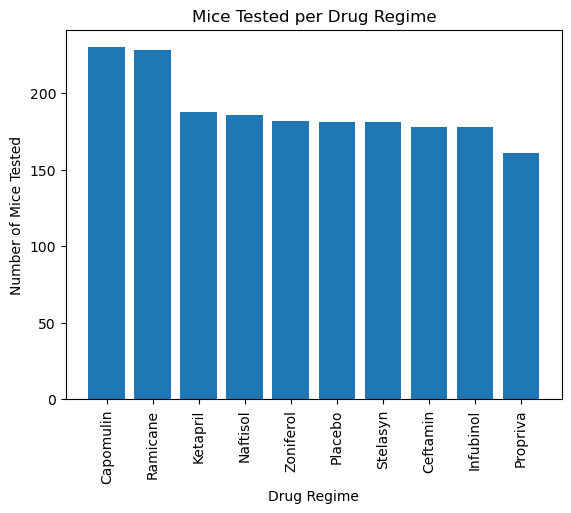

<Figure size 600x400 with 0 Axes>

In [69]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
regimen_df=combined_data.groupby(['Drug Regimen'])['Mouse ID'].count()

mice_count=[mice for mice in regimen_df]
labels=[drug for drug in regimen_df.keys()]

df = [[x,y]for x,y in zip(labels,mice_count)] 
df_sorted = sorted(df, key=lambda tup: tup[1], reverse=True)
df_sorted
plt.bar([val[0] for val in df_sorted],[val[1] for val in df_sorted])

plt.title("Mice Tested per Drug Regime")
plt.xlabel("Drug Regime")
plt.xticks(labels, labels, rotation ='vertical')
plt.ylabel("Number of Mice Tested")
plt.figure(figsize=(6,4));

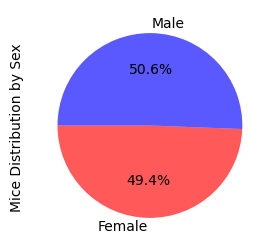

In [70]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

sex_dist=combined_data['Sex'].groupby(combined_data['Sex']).count()
colors=("red","blue")
sex_dist.plot(kind='pie', ylabel="Mice Distribution by Sex ",figsize=(6,3), autopct='%1.1f%%',colors=colors,startangle=180,wedgeprops={"alpha": 0.65});


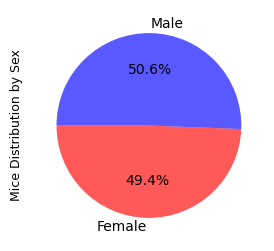

In [71]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

sex_dist=combined_data['Sex'].groupby(combined_data['Sex']).count()

mice_dist=[mice for mice in sex_dist]
labels=[sex for sex in sex_dist.keys()]

plt.figure(figsize=(6,3))
plt.ylabel("Mice Distribution by Sex",fontsize=9)
plt.pie(mice_dist, labels=labels,autopct='%1.1f%%',colors=colors,startangle=180,wedgeprops={"alpha": 0.65});

## Quartiles, Outliers and Boxplots

In [72]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
max=combined_data.groupby(['Mouse ID'])['Timepoint'].max()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
maxtime_df=pd.merge(combined_data, max,how='outer', on="Mouse ID")
maxtime_df.rename(columns={"Timepoint_x": "Timepoint", "Timepoint_y":"Max Timepoint"}, inplace=True)


drug_list=["Capomulin", "Ramicane", "Infubinol","Ceftamin"]

max_time=maxtime_df.loc[maxtime_df["Drug Regimen"].isin(drug_list)]
max_time=max_time.loc[(maxtime_df['Timepoint'] == maxtime_df['Max Timepoint']),('Drug Regimen','Timepoint','Mouse ID','Tumor Volume (mm3)','Weight (g)')] 

max_time['Tumor Volume (mm3)']


9       38.982878
214     36.321346
224     72.226731
226     46.250112
233     57.031862
          ...    
1857    34.455298
1867    47.685963
1877    33.329098
1882    30.485985
1892    28.430964
Name: Tumor Volume (mm3), Length: 100, dtype: float64

In [79]:
# A for loop is used to display the interquartile range (IQR) and the outliers for each treatment group (10 points)
# A box plot is generated that shows the distribution of the final tumor volume for all the mice in each treatment group. (5 points)

# Put treatments into a list for for loop (and later for plot labels)
drug_list=["Capomulin", "Ramicane", "Infubinol","Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
Capomulin_tvol=[]
Ramicane_tvol=[]
Infubinol_tvol=[]
Ceftamin_tvol=[]

drug_tvol=[]

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
treatments_df=max_time.reset_index(inplace=False)

# Locate the rows which contain mice on each drug and get the tumor volumes   
for row in range(len(treatments_df)):
    if treatments_df.iloc[row, 1]== "Capomulin":
        Capomulin_tvol.append(treatments_df.iloc[row, 4])
    elif treatments_df.iloc[row, 1]== "Ramicane":
        Ramicane_tvol.append(treatments_df.iloc[row, 4]) 
    elif treatments_df.iloc[row, 1]== "Infubinol":
        Infubinol_tvol.append(treatments_df.iloc[row, 4])
    elif treatments_df.iloc[row, 1]=="Ceftamin":
        Ceftamin_tvol.append(treatments_df.iloc[row, 4])
       
drug_results=pd.DataFrame(list(zip(Capomulin_tvol,Ramicane_tvol,Infubinol_tvol,Ceftamin_tvol)),columns =drug_list)

# Get the quantiles
for drug in range (4):
    q1=np.quantile(drug_results.iloc[:,drug],0.25)
    q2=np.quantile(drug_results.iloc[:,drug],0.50)
    q3=np.quantile(drug_results.iloc[:,drug],0.75)
    iqr=q3-q1
    lower_b=q1 - (1.5*iqr)
    upper_b=q3 + ( 1.5*iqr)      

    print(f"Quantile values for {drug_list[drug]} are: q1 = {q1: .2f}, q2= {q2: .2f}, q3 = {q3: .2f}. With bounds between [{lower_b: .2f} - {upper_b: .2f}].IQR equal to: {iqr: .2f}")
    print(f"Values below{lower_b: .2f} or above  {upper_b: .2f} are outliers")

#Determine outliers using upper and lower
 

Quantile values for Capomulin are: q1 =  32.38, q2=  38.13, q3 =  40.16. With bounds between [ 20.70 -  51.83].IQR equal to:  7.78
Values below 20.70 or above   51.83 are outliers
Quantile values for Ramicane are: q1 =  31.56, q2=  36.56, q3 =  40.66. With bounds between [ 17.91 -  54.31].IQR equal to:  9.10
Values below 17.91 or above   54.31 are outliers
Quantile values for Infubinol are: q1 =  54.05, q2=  60.17, q3 =  65.53. With bounds between [ 36.83 -  82.74].IQR equal to:  11.48
Values below 36.83 or above   82.74 are outliers
Quantile values for Ceftamin are: q1 =  48.72, q2=  59.85, q3 =  64.30. With bounds between [ 25.36 -  87.67].IQR equal to:  15.58
Values below 25.36 or above   87.67 are outliers


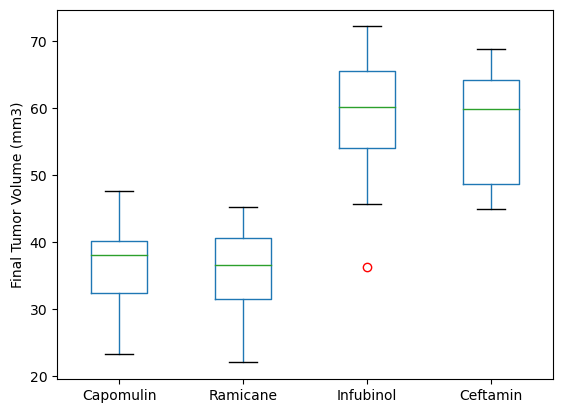

In [74]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
#manga=combined_data.loc[combined_data['Drug Regimen'] isin(treatments),('Tumor Volume(mm3)')]
whisker=drug_results.boxplot(grid=False, flierprops=dict(color='red', markeredgecolor='red'))
whisker.set_ylabel('Final Tumor Volume (mm3)');

## Line and Scatter Plots

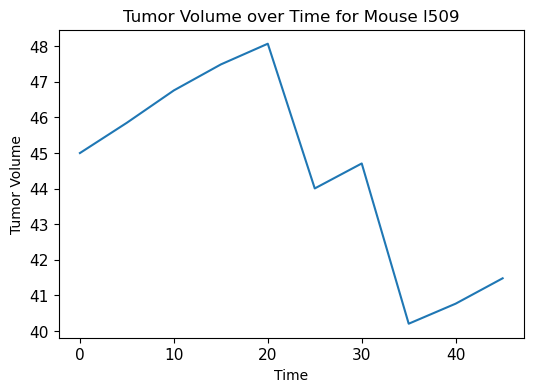

In [75]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
#Drug Regimen	Max Timepoint	Mouse ID	Tumor Volume (mm3)  est es tratments
sel_mouse='l509'
capomulin_df=combined_data.loc[(combined_data['Drug Regimen']=='Capomulin') & (combined_data['Mouse ID']==sel_mouse),('Tumor Volume (mm3)','Timepoint','Weight (g)')]

line_graph=capomulin_df.plot.line(x='Timepoint', y= 'Tumor Volume (mm3)',legend=False, fontsize=11,figsize=(6,4))
line_graph.set_title(f'Tumor Volume over Time for Mouse {sel_mouse}')
line_graph.set_xlabel('Time')
line_graph.set_ylabel(f'Tumor Volume');


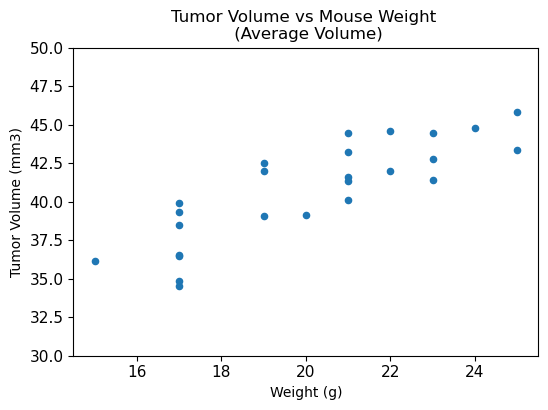

In [80]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
#CY If it was a plot for all the timepoints the solution will be:
#capomulin_w=combined_data.loc[(combined_data['Drug Regimen']=='Capomulin') ,('Tumor Volume (mm3)','Weight (g)')]

cap_tumor_weight=combined_data.loc[(combined_data['Drug Regimen']=='Capomulin') ,:]
avg_tumor=cap_tumor_weight.groupby('Mouse ID').mean()

scatter_graph=avg_tumor.plot.scatter(x='Weight (g)', y= 'Tumor Volume (mm3)',legend=False, fontsize=11,figsize=(6,4))
scatter_graph.set_title(f'Tumor Volume vs Mouse Weight \n (Average Volume)')
scatter_graph.set_ylim(30,50);

## Correlation and Regression

The correlation between weight and tumor volume is 0.84


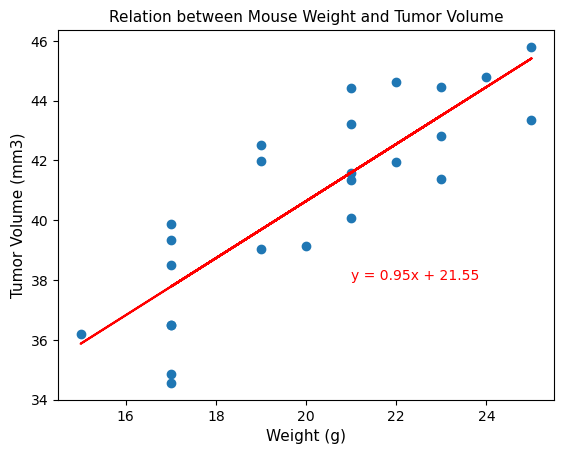

In [81]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

x_val = avg_tumor['Weight (g)']
y_val = avg_tumor['Tumor Volume (mm3)']

weight_tumor_correl = x_val.corr(y_val)
print(f"The correlation between weight and tumor volume is {weight_tumor_correl :.2f}")

#The following code was copied from excercise number 8- InsFit and Regression in Module 5 -Databootcamp
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_val, y_val)

regression = x_val * slope + intercept
line_equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_val,y_val)
plt.plot(x_val,regression,"r-")
plt.annotate(line_equation,(21,38),fontsize=10,color="red")
plt.xlabel('Weight (g)',fontsize=11)
plt.ylabel('Tumor Volume (mm3)',fontsize=11)
plt.title('Relation between Mouse Weight and Tumor Volume',fontsize=11)
plt.show()


